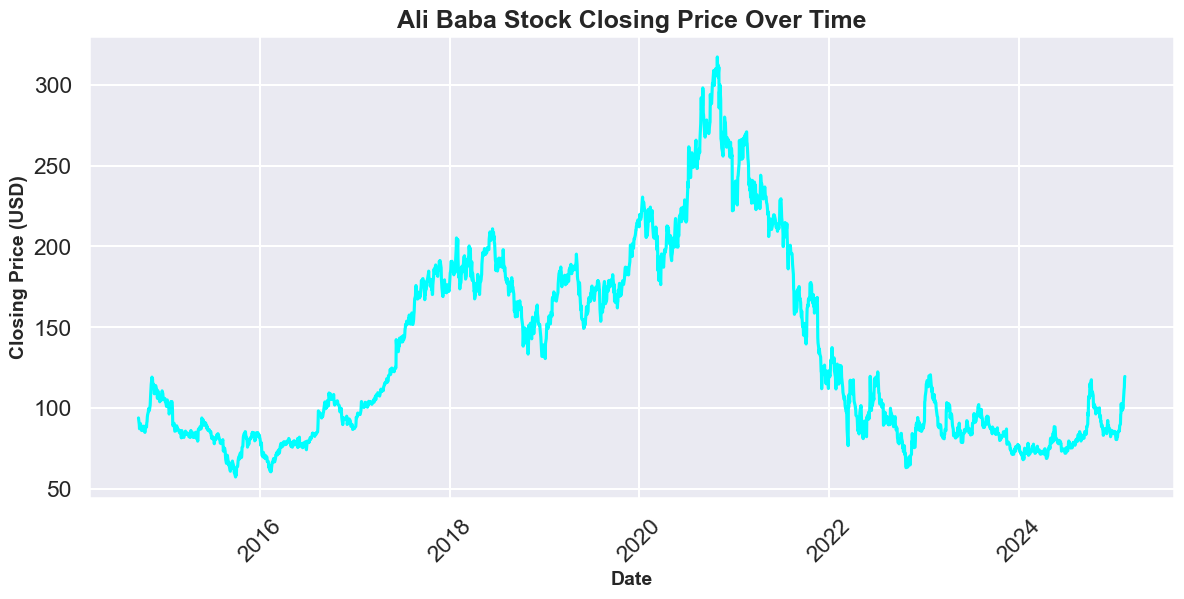

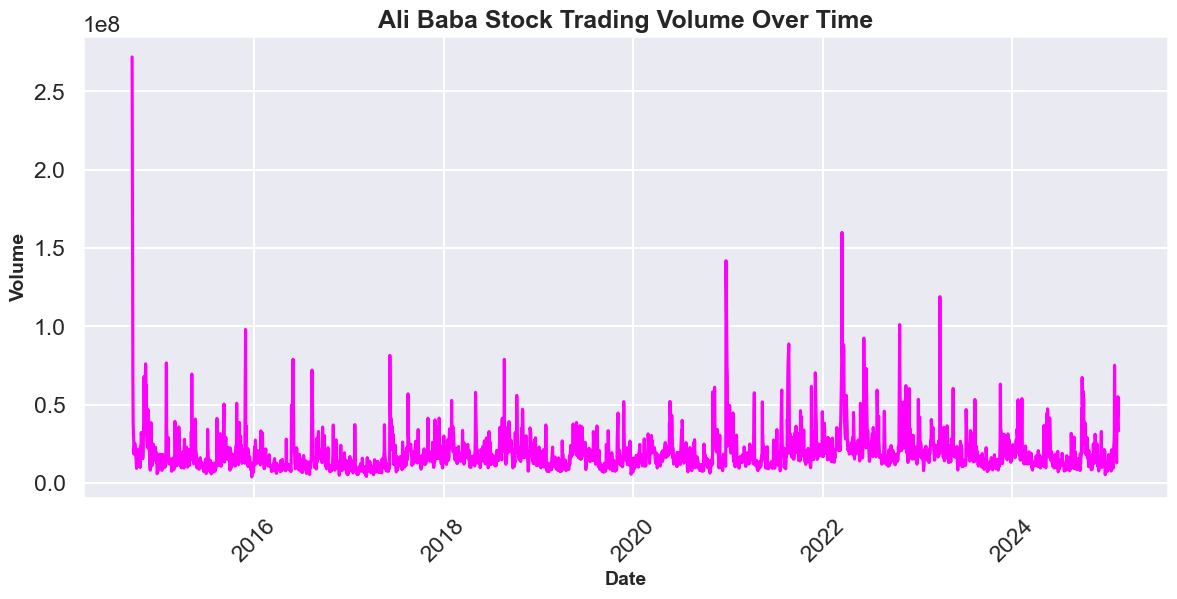

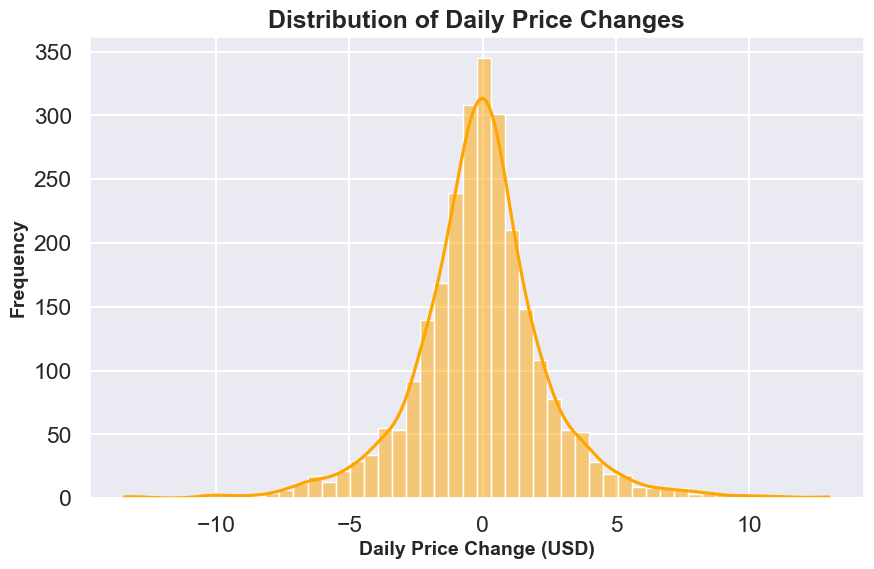

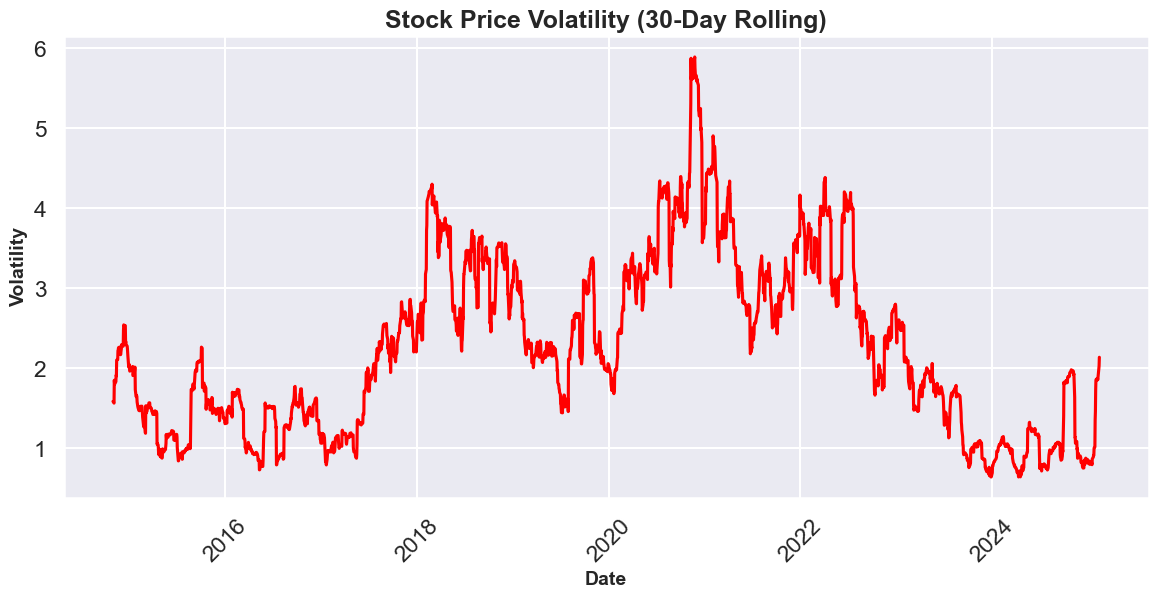

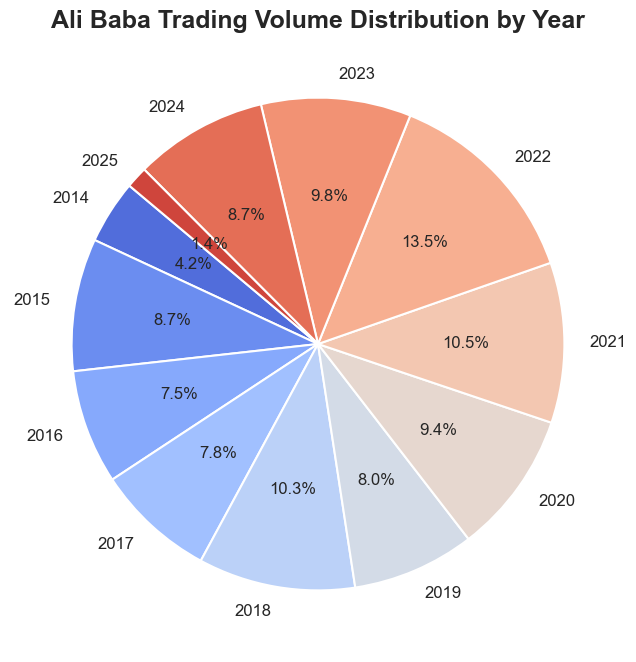

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set a cool, modern style
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("deep")
plt.rcParams.update({'font.size': 14, 'axes.labelweight': 'bold'})

# Load Ali Baba stock data
stock_data_path = "Ali_Baba_Stock_Data.csv"
ali_baba_df = pd.read_csv(stock_data_path)

# Convert Date column to datetime format
ali_baba_df["Date"] = pd.to_datetime(ali_baba_df["Date"])

# Sort data by Date
ali_baba_df = ali_baba_df.sort_values(by="Date")

# Plot Closing Price Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(x=ali_baba_df["Date"], y=ali_baba_df["Close"], color="cyan")
plt.title("Ali Baba Stock Closing Price Over Time", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Closing Price (USD)", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Plot Volume Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(x=ali_baba_df["Date"], y=ali_baba_df["Volume"], color="magenta")
plt.title("Ali Baba Stock Trading Volume Over Time", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Volume", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Calculate Daily Price Change
ali_baba_df["Daily Change"] = ali_baba_df["Close"] - ali_baba_df["Open"]

# Plot Daily Price Change Distribution
plt.figure(figsize=(10, 6))
sns.histplot(ali_baba_df["Daily Change"], bins=50, kde=True, color="orange")
plt.title("Distribution of Daily Price Changes", fontsize=18, fontweight='bold')
plt.xlabel("Daily Price Change (USD)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

# Calculate Volatility (Rolling Standard Deviation of Daily Change)
ali_baba_df["Volatility"] = ali_baba_df["Daily Change"].rolling(window=30).std()

# Plot Volatility Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(x=ali_baba_df["Date"], y=ali_baba_df["Volatility"], color="red")
plt.title("Stock Price Volatility (30-Day Rolling)", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Volatility", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Pie Chart for Trading Volume Distribution Over Time (Grouped by Year)
ali_baba_df["Year"] = ali_baba_df["Date"].dt.year
volume_by_year = ali_baba_df.groupby("Year")["Volume"].sum()

plt.figure(figsize=(8, 8))
plt.pie(volume_by_year, labels=volume_by_year.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(volume_by_year)), startangle=140, textprops={'fontsize': 12})
plt.title("Ali Baba Trading Volume Distribution by Year", fontsize=18, fontweight='bold')
plt.show()